In [ ]:
!unzip /content/skindata.zip
# !unzip /content/dataset.zip

Archive:  /content/skindata.zip
warning [/content/skindata.zip]:  88080384 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  88080384
  (attempting to re-compensate)
error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import random

In [ ]:
# Set the root directory of your dataset
root_dir = "/content/data/Skincare"

# Set the directories for train, test, and validation data
train_dir = "/content/dataset/Train"
test_dir = "/content/dataset/Test"
valid_dir = "/content/dataset/valid"

# Create the train, test, and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# Define the test and validation split ratios
test_size = 0.2
valid_size = 0.2

# Loop through each class folder
for class_folder in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_folder)
    
    # Split the data into train and test sets for the current class
    train_data, test_data = train_test_split(os.listdir(class_path), test_size=test_size, random_state=42)
    
    # Split the test data into test and validation sets for the current class
    test_data, valid_data = train_test_split(test_data, test_size=valid_size, random_state=42)
    
    # Create the class directories in train, test, and valid directories if they don't exist
    train_class_dir = os.path.join(train_dir, class_folder)
    os.makedirs(train_class_dir, exist_ok=True)
    
    test_class_dir = os.path.join(test_dir, class_folder)
    os.makedirs(test_class_dir, exist_ok=True)
    
    valid_class_dir = os.path.join(valid_dir, class_folder)
    os.makedirs(valid_class_dir, exist_ok=True)
    
    # Move the images to the appropriate directories
    for img in train_data:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(train_class_dir, img)
        
        # Load the image
        img = cv2.imread(src_path)
        
        # Apply contrast stretching
        img = cv2.convertScaleAbs(img, alpha=1.5, beta=0)
        
        # Save the enhanced image
        cv2.imwrite(dest_path, img)
        
    for img in test_data:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(test_class_dir, img)
        shutil.copy(src_path, dest_path)
        
    for img in valid_data:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(valid_class_dir, img)
        shutil.copy(src_path, dest_path)

In [ ]:


# Set the directories for train, test, and validation data
train_dir = "/content/newdataset/Train"
test_dir = "/content/newdataset/Test"
valid_dir = "/content/newdataset/valid"

# Define the image size for resizing
image_size = (224, 224)

# Define a function to load the images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    class_labels = os.listdir(folder)
    
    for class_label in class_labels:
        class_folder = os.path.join(folder, class_label)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(class_label)
    
    return np.array(images), np.array(labels)

# Load the images and labels for train, test, and validation data
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
x_valid, y_valid = load_images_from_folder(valid_dir)

# Normalize pixel values to range between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0

# Reshape the input data to match the expected input shape for the model
x_train = np.reshape(x_train, (-1, 224, 224, 3))
x_test = np.reshape(x_test, (-1, 224, 224, 3))
x_valid = np.reshape(x_valid, (-1, 224, 224, 3))

# Convert the labels to numerical values using label encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_valid = label_encoder.transform(y_valid)

In [ ]:
x_train.shape
# y_valid.shape

(1583, 224, 224, 3)

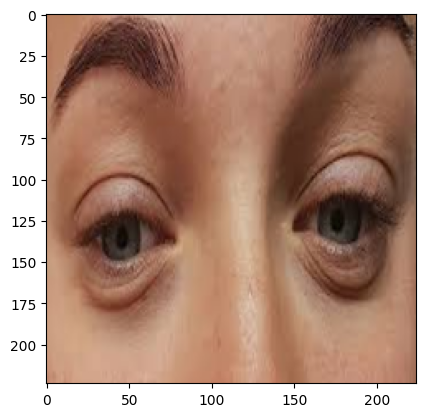

2


In [ ]:

i = np.random.randint(1, len(x_train))
rgb_image = cv2.cvtColor(x_train[i], cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

print(y_train[i])


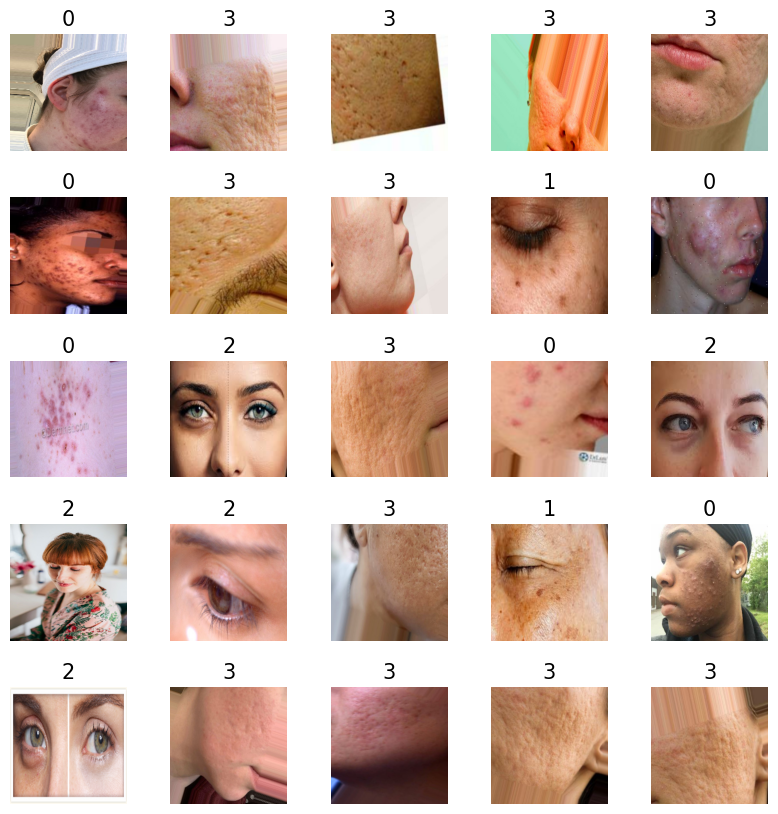

In [ ]:
#viewing images

W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, W_grid*L_grid):
  index = np.random.randint(0, n_training)
  rgb_image = cv2.cvtColor(x_train[index], cv2.COLOR_BGR2RGB)
  axes[i].imshow(rgb_image)
  axes[i].set_title(y_train[index], fontsize = 15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)



In [ ]:
# # converting images into greyscale

# from sklearn.utils import shuffle
# x_train, y_train = shuffle(x_train, y_train)
# x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
# x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)
# x_valid_gray = np.sum(x_valid/3, axis = 3, keepdims = True)

In [ ]:
# x_train_gray

In [ ]:
# x_train_gray_norm = (x_train_gray - 128)/128
# x_test_gray_norm = (x_test_gray - 128)/128
# x_valid_gray_norm = (x_valid_gray - 128)/128

In [ ]:
# x_train_gray_norm

In [ ]:
# i = random.randint(1, len(x_train_gray))
# plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
# plt.figure()
# plt.imshow(x_train[i])
# plt.figure()
# plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

In [ ]:


# CNN Model
CNN = models.Sequential()
CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(224, 224, 3)))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Dropout(0.2))
CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Flatten())
CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(num_classes, activation='softmax'))  # Using num_classes from previous code
CNN.summary()





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 average_pooling2d_6 (Averag  (None, 110, 110, 6)      0         
 ePooling2D)                                                     
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 6)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 53, 53, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 44944)            

In [ ]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = CNN.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


Epoch 1/10
50/50 [==============================] - 83s 2s/step - loss: 1.6132 - accuracy: 0.2849 - val_loss: 1.5646 - val_accuracy: 0.2561
Epoch 2/10
50/50 [==============================] - 79s 2s/step - loss: 1.5065 - accuracy: 0.3392 - val_loss: 1.3555 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 82s 2s/step - loss: 1.2273 - accuracy: 0.5003 - val_loss: 1.1803 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 83s 2s/step - loss: 1.0995 - accuracy: 0.5597 - val_loss: 1.1621 - val_accuracy: 0.4878
Epoch 5/10
50/50 [==============================] - 80s 2s/step - loss: 0.8475 - accuracy: 0.6646 - val_loss: 1.1455 - val_accuracy: 0.4634
Epoch 6/10
50/50 [==============================] - 78s 2s/step - loss: 0.6328 - accuracy: 0.7498 - val_loss: 1.2163 - val_accuracy: 0.4878
Epoch 7/10
50/50 [==============================] - 78s 2s/step - loss: 0.4201 - accuracy: 0.8515 - val_loss: 1.3223 - val_accuracy: 0.5000
Epoch 8/10
50/50 [==

In [ ]:
CNN.save('model.h5')

In [ ]:
# Load the saved model
model = tf.keras.models.load_model('model.h5')

# Preprocess the test data
x_test = x_test.astype('float32') / 255.0
x_test = np.reshape(x_test, (-1, 224, 224, 3))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


10/10 [==============================] - 5s 449ms/step - loss: 9.7978 - accuracy: 0.1524
Test Loss: 9.797785758972168
Test Accuracy: 0.15238095819950104


1/1 [==============================] - 0s 112ms/step
Predicted Class: acne
Probability: 0.5212322


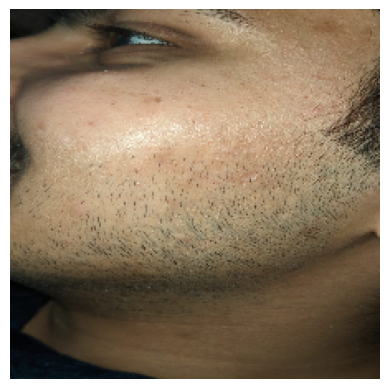

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('model.h5')

# Define the image path
image_path = '/content/same.jpg'

# Read and preprocess the image
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)

# Predict the class probabilities
predictions = model.predict(image)
predicted_class = np.argmax(predictions)

# Get the class labels
class_labels = ['acne', 'dark spots', 'puffy eyes', 'scar', 'wrinkles']

# Print the predicted class label and probability
print('Predicted Class:', class_labels[predicted_class])
print('Probability:', predictions[0][predicted_class])

# Display the image
plt.imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
